In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv')
inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000


In [29]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
6918,Apartamento,Apartamento en venta en Nueva Autopista,2,2,75,Nueva Autopista,Los Cedros,$ 495.000.000,$,495.000.000


In [41]:
valor = inmuebles.Valor.str.split(expand=True)

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]

inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14


In [42]:
inmuebles['Valor_m2_Millon'] = inmuebles['Precio_Millon']/inmuebles['Area']

datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']

m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

inmuebles['Valor_m2_Barrio'] = inmuebles['Barrio']
inmuebles['Valor_m2_Barrio'] = inmuebles['Valor_m2_Barrio'].map(m2_barrio)

inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos_raw = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Identificacion (Capítulo A).csv',sep=';',encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [ ]:
datos_b = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Educacion (Capítulo H).csv',sep=';',encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Percepcion sobre las condiciones de vida y el desempenio institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')

<ipython-input-6-7bcb92f74816>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-6-7bcb92f74816>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-6-7bcb92f74816>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/inmersion_datos/Educacion (Capítulo H).csv',sep=';',encoding='latin-1')
<ipython-input-6-7bcb92f74816>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_l 

In [ ]:
datos_dane = pd.merge(datos_raw, datos_b, on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [ ]:
datos_dane = pd.merge(datos_dane, datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane = pd.merge(datos_dane, datos_e, on='DIRECTORIO', how='left')

<ipython-input-9-fafc5821c3e2>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane, datos_e, on='DIRECTORIO', how='left')


In [ ]:
datos_dane.shape

(238559, 281)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


## **Aula 4**

In [12]:
datos_dane = pd.read_csv('/content/drive/MyDrive/inmersion_datos/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [13]:
datos_dane.shape

(9857, 55)

In [14]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [15]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [16]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [17]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776


In [18]:
datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.0,1.0,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.0,1.0,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.0,1.0,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.0,1.0,0,1,0


In [19]:
datos.NOMBRE_ESTRATO.value_counts()

Niza                                                   243
SUBA: La Academia + Guaymaral + San José de Bavaria    212
CHAPINERO: Chicó Lago + El Refugio                     210
Los Libertadores                                       208
Modelia                                                205
                                                      ... 
Tunjuelito                                              26
Lourdes                                                 25
Localidad Chapinero resto                               21
Localidad Usaquén resto                                 10
Localidad Santa Fe resto                                 8
Name: NOMBRE_ESTRATO, Length: 102, dtype: int64

In [24]:
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.0,1.0,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.0,1.0,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.0,1.0,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.0,1.0,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.0,1.0,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.0,1.0,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.0,1.0,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.0,1.0,0,0,1


In [45]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


In [46]:
pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [47]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_Millon             9520 non-null   float64
 11  Valor_m2_Millon           9520 non-null   float64
 12  Valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [48]:
upz = pd.read_csv('/content/drive/MyDrive/inmersion_datos/cod_upz.csv')
upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


In [49]:
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO',how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [50]:
datos_ml.shape

(9318, 26)

In [51]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Millon             9318 non-null   float64
 11  Valor_m2_Millon           9318 non-null   float64
 12  Valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

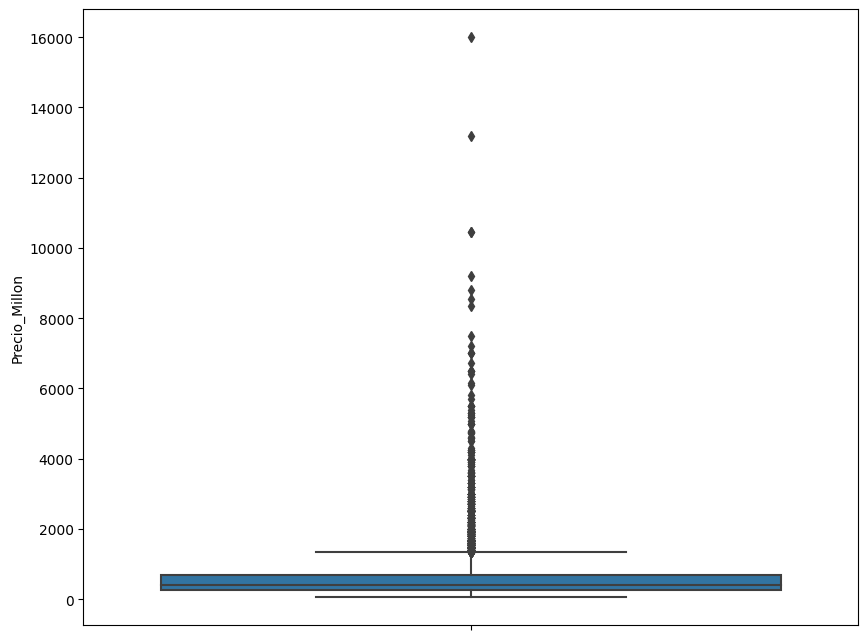

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y='Precio_Millon')
plt.show()

In [54]:
datos_ml.query('Precio_Millon > 5000 | Precio_Millon < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00


In [58]:
datos_ml = datos_ml.query('Precio_Millon < 5000 & Precio_Millon > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00


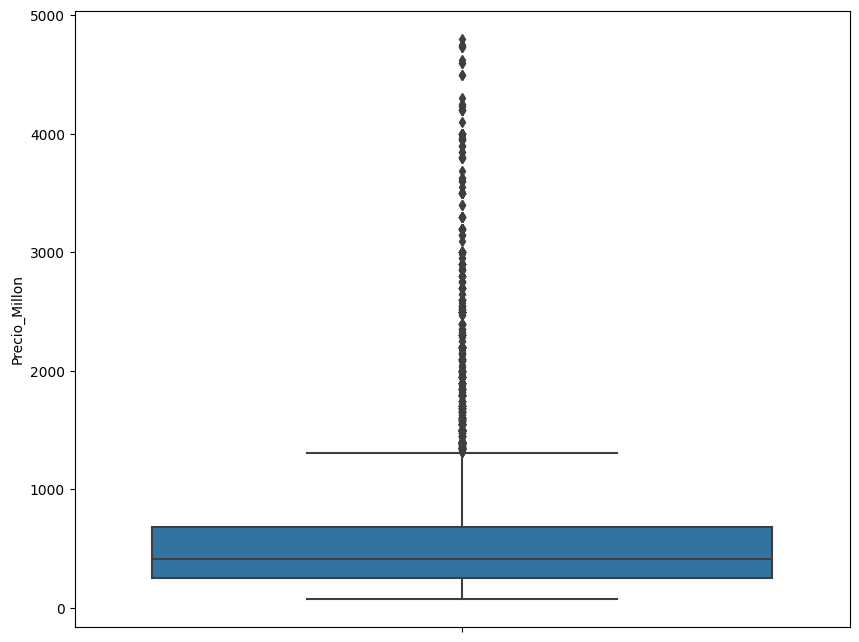

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y='Precio_Millon')
plt.show()

In [61]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

<ipython-input-61-71287e70a4cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000


0      48.42
1      48.42
2      48.42
3      48.42
4      48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 9277, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

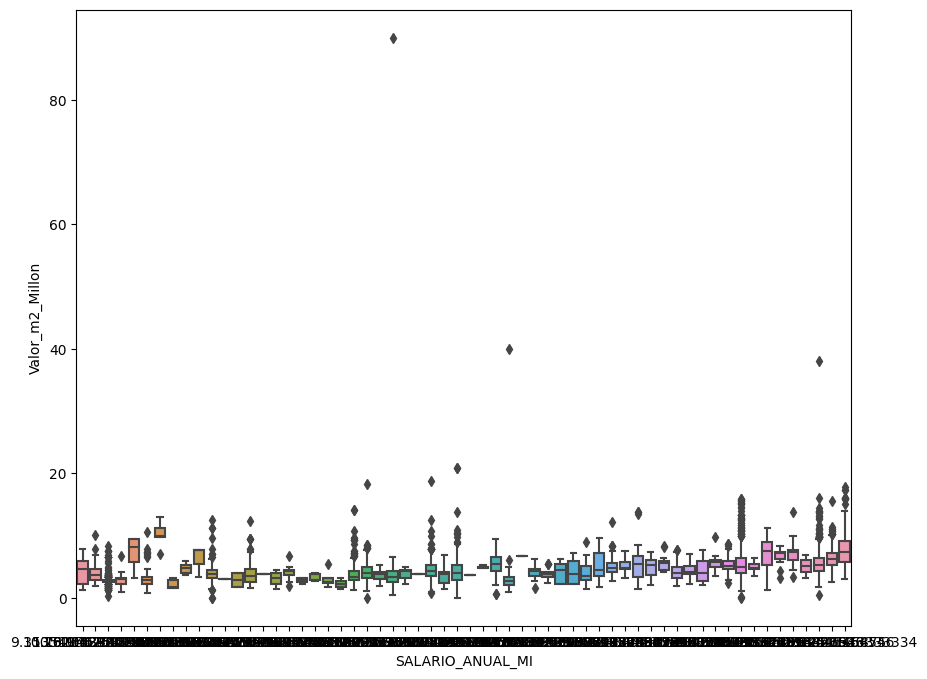

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, x='SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

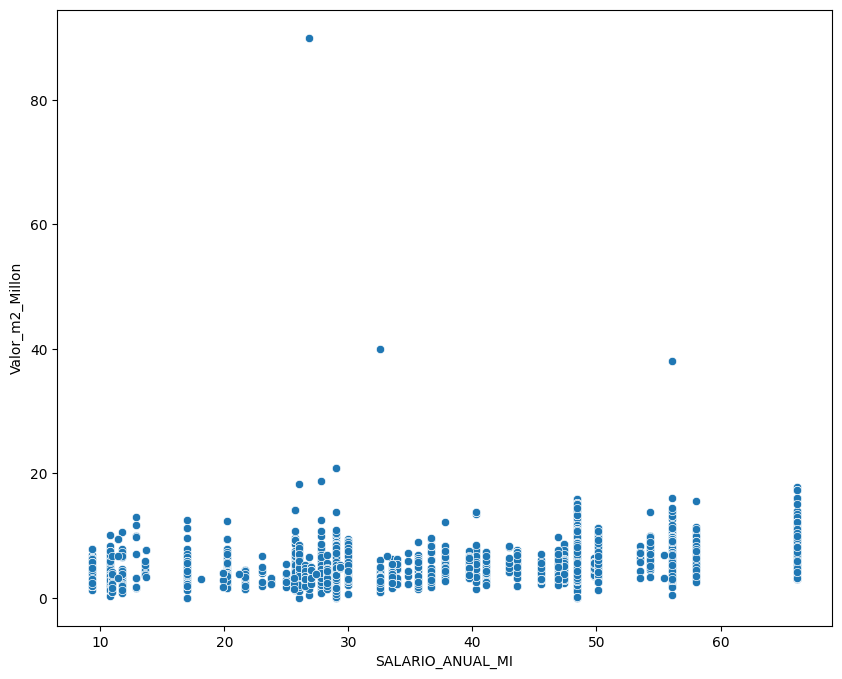

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

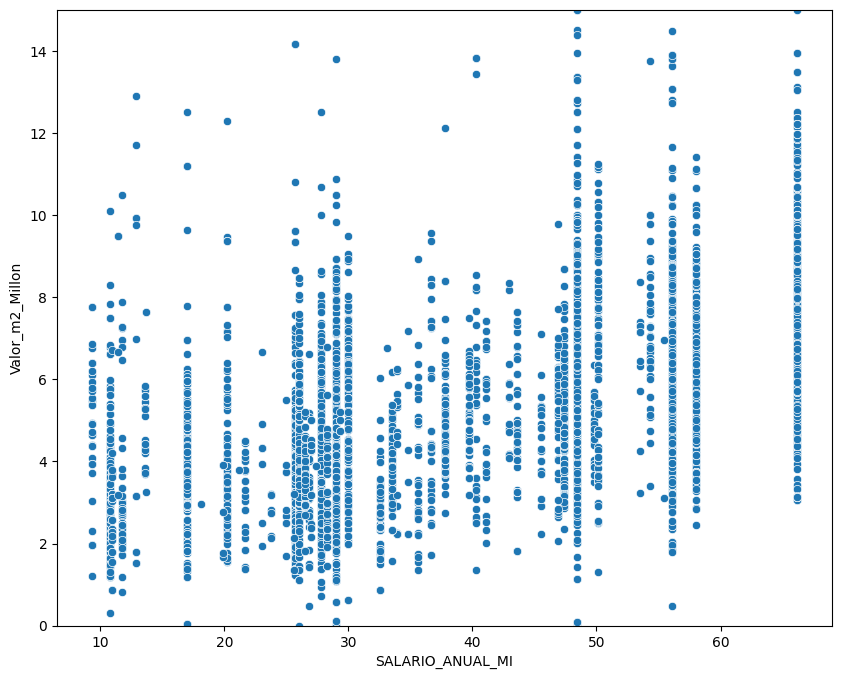

In [66]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.ylim(0,15)
plt.show

In [67]:
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.48,0.03,0.22,-0.23,-0.18,-0.11,0.12,0.06,0.11,0.13,0.10,-0.15,-0.06,0.06,0.11,0.07,-0.09,-0.15
Banos,0.48,1.00,0.06,0.65,0.08,0.16,0.16,-0.19,-0.16,-0.08,-0.18,-0.20,0.20,0.12,-0.09,-0.15,-0.10,0.07,0.20
Area,0.03,0.06,1.00,0.05,-0.04,-0.03,-0.01,-0.01,-0.01,-0.01,-0.00,0.01,-0.00,-0.01,0.01,0.01,0.01,-0.00,-0.00
Precio_Millon,0.22,0.65,0.05,1.00,0.41,0.32,0.21,-0.26,-0.18,-0.09,-0.25,-0.23,0.32,0.11,-0.13,-0.22,-0.17,0.20,0.32
Valor_m2_Millon,-0.23,0.08,-0.04,0.41,1.00,0.50,0.32,-0.37,-0.27,-0.19,-0.36,-0.33,0.46,0.20,-0.20,-0.35,-0.22,0.27,0.46
Valor_m2_Barrio,-0.18,0.16,-0.03,0.32,0.50,1.00,0.64,-0.66,-0.37,-0.41,-0.66,-0.59,0.82,0.37,-0.31,-0.64,-0.25,0.41,0.82
CONJUNTO_CERRADO,-0.11,0.16,-0.01,0.21,0.32,0.64,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.04,0.09,0.80
INSEGURIDAD,0.12,-0.19,-0.01,-0.26,-0.37,-0.66,-0.84,1.00,0.50,0.60,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.01,-0.18,-0.27,-0.37,-0.29,0.50,1.00,0.38,0.66,0.57,-0.52,-0.29,0.18,0.35,0.26,-0.11,-0.52
BARES_DISCO,0.11,-0.08,-0.01,-0.09,-0.19,-0.41,-0.51,0.60,0.38,1.00,0.60,0.51,-0.38,-0.25,-0.02,0.33,-0.06,0.27,-0.38


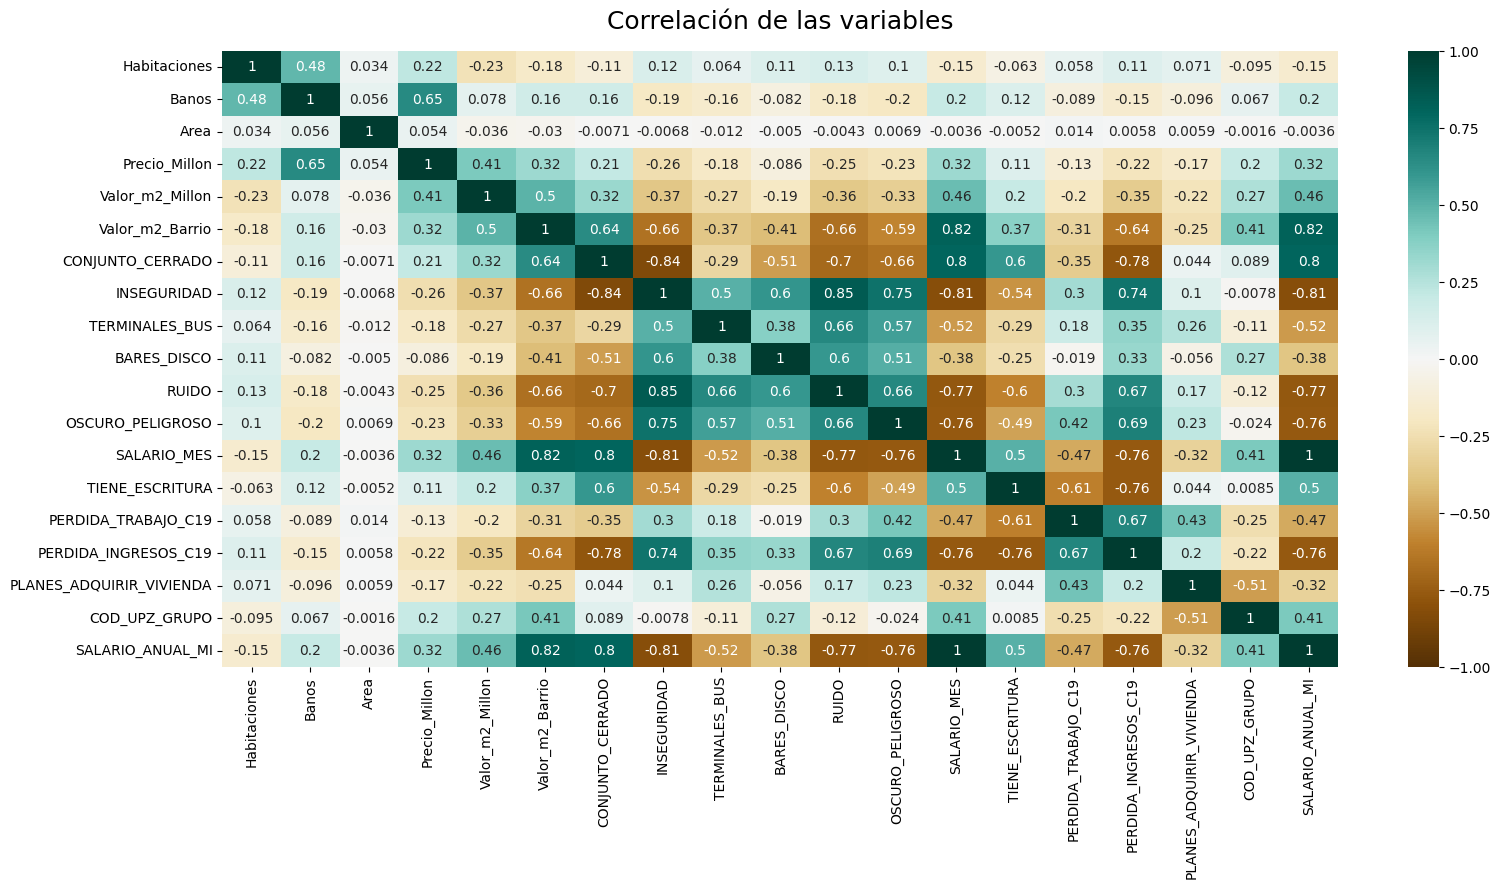

In [69]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

### **Machine learning**

In [73]:
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [74]:
X_train

,COD_UPZ_GRUPO
7578,810.00
8345,98.00
1246,816.00
8491,809.00
4602,47.00
...,...
5223,19.00
7929,85.00
1784,817.00
3268,14.00


In [75]:
X_test

,COD_UPZ_GRUPO
8428,809.00
3079,14.00
6927,75.00
6861,75.00
2357,14.00
...,...
7777,85.00
1423,817.00
3916,803.00
8305,98.00


In [76]:
y_train

7578   550.00
8345   700.00
1246   710.00
8491   400.00
4602   650.00
        ...  
5223   360.00
7929   119.00
1784   650.00
3268   350.00
7242   480.00
Name: Precio_Millon, Length: 6957, dtype: float64

In [77]:
y_test

8428    650.00
3079    550.00
6927    327.00
6861    260.00
2357    460.00
         ...  
7777    131.00
1423    695.00
3916   1000.00
8305   1100.00
3989    265.00
Name: Precio_Millon, Length: 2320, dtype: float64

In [78]:
modelo = LinearRegression()

In [79]:
modelo.fit(X_train,y_train)

LinearRegression()

In [82]:
y_predict_test = modelo.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_mae

349.01934464671155

In [85]:
baseline_r2 = r2_score(y_test, y_predict_test)
baseline_r2

0.025479229587150987

In [87]:
print(baseline_mae, baseline_r2)

349.01934464671155 0.025479229587150987


In [86]:

X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos']] #,'CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'

Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

241.7714514560005 0.39346598615451067
243.29145256483525 0.47023870196651907


In [88]:

X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

241.92824945672513 0.4253766410151324
243.25185242026816 0.48545749312201236


**Cambio del filtrado de datos Precio_Millon < 1200**

In [89]:
#Cambio del filtrado de datos Precio_Millon < 1200
datos_ml = datos_ml.query('Precio_Millon < 1200 & Precio_Millon > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34


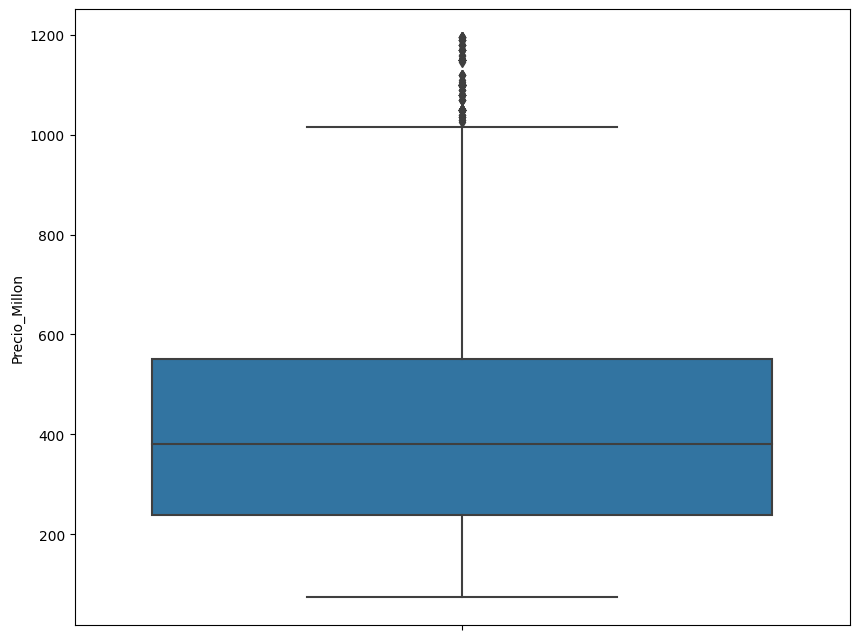

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml, y='Precio_Millon')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

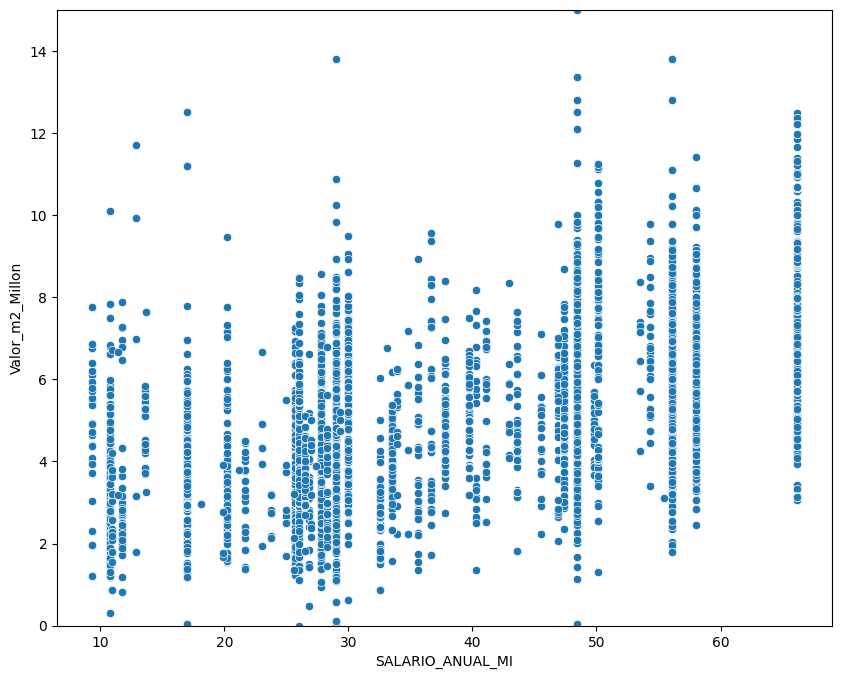

In [91]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.ylim(0,15)
plt.show

In [92]:
datos_ml.corr()

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.44,0.03,0.18,-0.31,-0.21,-0.12,0.13,0.08,0.11,0.14,0.11,-0.17,-0.08,0.07,0.13,0.09,-0.12,-0.17
Banos,0.44,1.00,0.04,0.66,-0.03,0.13,0.16,-0.19,-0.17,-0.12,-0.17,-0.21,0.18,0.13,-0.09,-0.15,-0.08,0.01,0.18
Area,0.03,0.04,1.00,0.04,-0.04,-0.04,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.01,-0.01
Precio_Millon,0.18,0.66,0.04,1.00,0.36,0.40,0.32,-0.37,-0.28,-0.23,-0.35,-0.38,0.42,0.21,-0.17,-0.32,-0.18,0.17,0.42
Valor_m2_Millon,-0.31,-0.03,-0.04,0.36,1.00,0.49,0.33,-0.37,-0.29,-0.22,-0.37,-0.35,0.46,0.23,-0.20,-0.36,-0.21,0.26,0.46
Valor_m2_Barrio,-0.21,0.13,-0.04,0.40,0.49,1.00,0.65,-0.66,-0.38,-0.41,-0.66,-0.60,0.82,0.41,-0.31,-0.65,-0.23,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.16,-0.01,0.32,0.33,0.65,1.00,-0.84,-0.30,-0.51,-0.70,-0.67,0.81,0.61,-0.35,-0.78,0.05,0.08,0.81
INSEGURIDAD,0.13,-0.19,-0.00,-0.37,-0.37,-0.66,-0.84,1.00,0.51,0.60,0.85,0.75,-0.82,-0.56,0.29,0.74,0.09,0.00,-0.82
TERMINALES_BUS,0.08,-0.17,-0.01,-0.28,-0.29,-0.38,-0.30,0.51,1.00,0.39,0.67,0.57,-0.51,-0.30,0.17,0.36,0.25,-0.09,-0.51
BARES_DISCO,0.11,-0.12,-0.01,-0.23,-0.22,-0.41,-0.51,0.60,0.39,1.00,0.60,0.49,-0.38,-0.25,-0.02,0.33,-0.05,0.26,-0.38


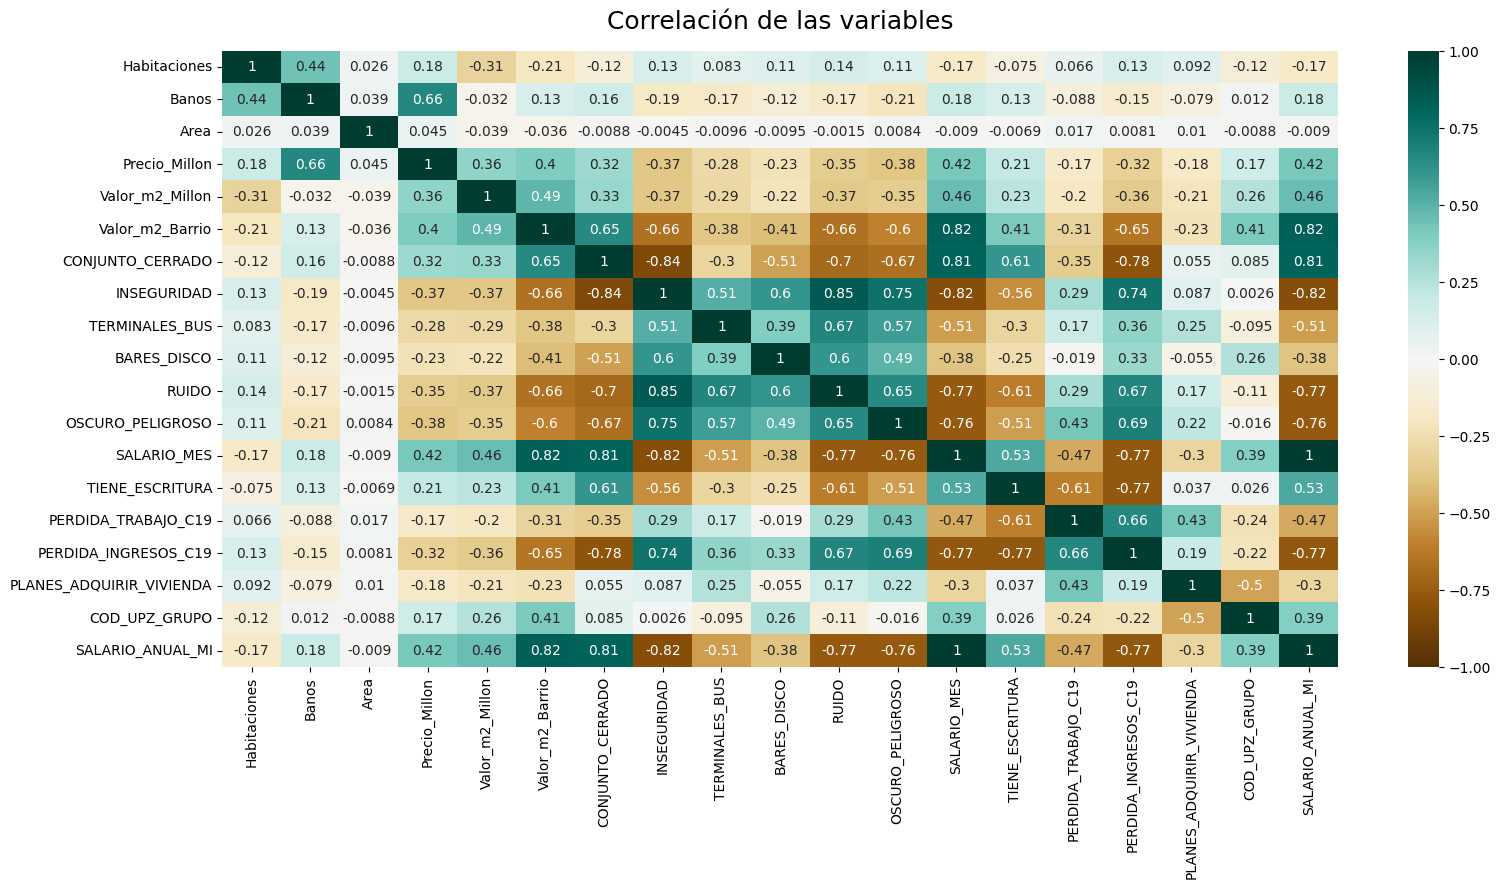

In [93]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

In [94]:
X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [95]:
X_train

,COD_UPZ_GRUPO
1512,817.00
7864,85.00
6058,21.00
1683,817.00
2481,14.00
...,...
6038,21.00
8875,102.00
2200,14.00
3883,803.00


In [96]:
X_test

,COD_UPZ_GRUPO
6340,74.00
7805,85.00
4902,47.00
7041,100.00
2436,14.00
...,...
3323,14.00
3945,803.00
5572,27.00
3633,803.00


In [97]:
y_train

1512   1050.00
7864    129.00
6058    206.38
1683    650.00
2481    250.00
         ...  
6038    560.00
8875    560.00
2200    685.00
3883    850.00
8154    132.00
Name: Precio_Millon, Length: 6234, dtype: float64

In [98]:
modelo = LinearRegression()

In [99]:
modelo.fit(X_train,y_train)

LinearRegression()

In [100]:
y_predict_test = modelo.predict(X_test)

In [101]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test)
baseline_r2 = r2_score(y_test, y_predict_test)
print(baseline_mae, baseline_r2)

187.323609443345 0.031111799984413713


In [102]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]
Y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)
y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988


In [103]:
#Datos ingresados por cliente
modelo_1.predict([[826,3,2,1,50,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.43207157])

**Desafíos de esta aula**
  -  Probar con otros modelos de ML;
  -  Trabajar más con los datos y crear nuevas variables;
  -  Probar predicciones para casos reales;    